In [1]:
import numpy as np
import pandas as pd

In [68]:
def read_rawimage(file,slices=np.arange(-45,45,8)):
    df = pd.read_csv(file,header=None)
    image_cols = df.iloc[:,:-4].astype(str)
    last_col = df.iloc[:,-2]/100*(180/np.pi)
    new_last_col = last_col.apply(lambda x: np.abs(x-slices).argmin())
    image = image_cols.apply(lambda col: np.array(eval(','.join(col.to_list()))).astype(float),axis=1)
    new_df = pd.DataFrame({'Image':image,'Slice':new_last_col})
    maxval = new_df['Image'].apply(lambda x: np.max(x))
    new_df = new_df[maxval > 0]
    new_df = new_df[(new_df['Slice']>0) & (new_df['Slice']<11)]
    return new_df

In [69]:
fullclip1 = read_rawimage('data-RawImage-rpi1.csv')
emptyclip1 = read_rawimage('data-RawImage-rpi1-empty-0619.csv')
pipe1 = read_rawimage('data-RawImage-rpi1-pipe-0619.csv')

In [70]:
fullclip2 = read_rawimage('data-RawImage-fullMag-0620.csv')
emptyclip2 = read_rawimage('data-RawImage-empty-0620.csv')
pipe2 = read_rawimage('data-RawImage-pipe-0620.csv')

In [72]:
fc = pd.concat([fullclip1,fullclip2])
pp = pd.concat([pipe1,pipe2])

In [84]:
cutfc = fc.shape[0]//5
cutpp = pp.shape[0]//5

In [117]:
fc_test = fc.iloc[cutfc:2*cutfc,:]
fc_train = fc.iloc[2*cutfc:,:]
pp_test = pp.iloc[cutpp:2*cutpp,:]
pp_train = pp.iloc[2*cutpp:,:]

In [118]:
def generate_images(df,n_gen=5,xshift=20,yshift=10,xcrop=[20,80],ycrop=[10,60]):
    images = []
    for i,row in df.iterrows():
        x = np.random.randint(xshift,size=n_gen)
        y = np.random.randint(yshift,size=n_gen)
        orig = row['Image']
        xdim,ydim = orig.shape
        for j in range(n_gen):
            aug = np.zeros_like(orig)
            aug[x[j]:,y[j]:] = orig[:xdim-x[j],:ydim-y[j]]
            images.append(aug)
    images = np.stack(images)
    images = images[:,xcrop[0]:xcrop[1],ycrop[0]:ycrop[1]]
    return images

In [119]:
fc_train_im = generate_images(fc_train,n_gen=4)
fc_test_im = generate_images(fc_test,n_gen=4)
pp_train_im = generate_images(pp_train,n_gen=30)
pp_test_im = generate_images(pp_test,n_gen=30)

In [120]:
fc_train_im.shape

(1600, 60, 50)

In [121]:
fc_test_im.shape

(528, 60, 50)

In [122]:
pp_train_im.shape

(1620, 60, 50)

In [123]:
pp_test_im.shape

(510, 60, 50)

In [124]:
import h5py

In [125]:
hf = h5py.File('data2d.h5','w')
hf.create_dataset('fc_train',data=fc_train_im,compression="gzip",compression_opts=9)
hf.create_dataset('fc_test',data=fc_test_im,compression="gzip",compression_opts=9)
hf.create_dataset('pp_train',data=pp_train_im,compression="gzip",compression_opts=9)
hf.create_dataset('pp_test',data=pp_test_im,compression="gzip",compression_opts=9)
hf.close()


In [126]:
fullclip1.head()

,Image,Slice
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3


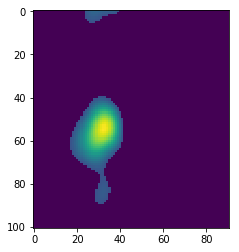

In [127]:
plt.imshow(fullclip1.iloc[0,0])
plt.gcf(